<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Planar potential flows past stationary bodies

In this notebook we will discuss potential flows in the vicinity of stationary bodies. 

### Set up the module

In [1]:
using MAE150A

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/MAE150A/A9IAL.ji for MAE150A [a017625c-406c-46ee-99d6-0fac6062339e]
└ @ Base loading.jl:1240


In [2]:
pyplot()
initialize_environment()

## A body generated by singularity distribution

## A conformally-mapped body

In [6]:
?PotentialFlow.ConformalBody

```
ConformalBody <: Elements.Element
```

Generates a body from a conformal map. This might be a Schwarz-Christoffel map, in which case the constructor is supplied a polygon, or it might be a power- series map, in which case the constructor is given a set of complex coefficients.

# Example

```jldoctest
julia> p = Bodies.Polygon([-1.0,0.2,1.0,-1.0],[-1.0,-1.0,0.5,1.0])
Polygon with 4 vertices at
             (-1.0,-1.0) (0.2,-1.0) (1.0,0.5) (-1.0,1.0)
             interior angles/π = [0.5, 0.656, 0.422, 0.422]

julia> Bodies.ConformalBody(p)
Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 4 vertices

  centroid at 0.0 + 0.0im
  angle 0.0

julia> a1 = 1; b1 = 0.1; ccoeff = ComplexF64[0.5(a1+b1),0,0.5(a1-b1)];

julia> Bodies.ConformalBody(ccoeff,ComplexF64(1.0),π/4)
Body generated by: Power series map

  centroid at 1.0 + 0.0im
  angle 0.7854
```


In [7]:
p = PotentialFlow.Bodies.Polygon([-1.0,0.2,1.0,-1.0],[-1.0,-1.0,0.5,1.0])

Polygon with 4 vertices at
             (-1.0,-1.0) (0.2,-1.0) (1.0,0.5) (-1.0,1.0) 
             interior angles/π = [0.5, 0.656, 0.422, 0.422]


In [8]:
body = PotentialFlow.Bodies.ConformalBody(p)

Body generated by: Schwarz-Christoffel map of unit circle to exterior of polygon with 4 vertices

  centroid at 0.0 + 0.0im
  angle 0.0


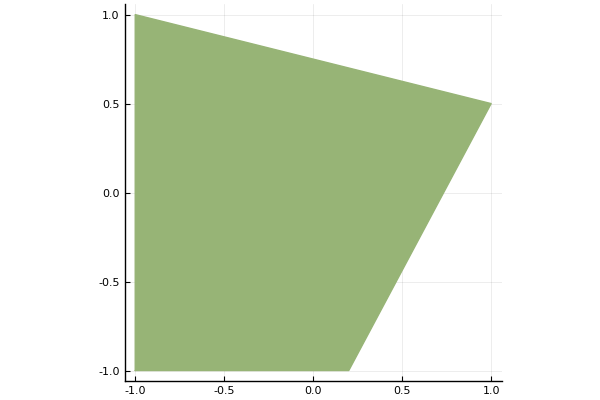

In [9]:
plot(body)

### Set up a grid on which to visualize the potential flows

In [10]:
# grid cell size
Δx = 0.02

# set the size of a region in which to set up the flow.
xlim = (-2,2)
ylim = (-2,2)

# make the grid
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((208, 208), (104, 104), 0.02, ((-2.06, 2.06), (-2.06, 2.06)))

And here is the streamfunction and velocity and their associated grid coordinates

In [11]:
ψ = Nodes(Dual,size(g)) # streamfunction field
u = Edges(Primal,size(g)) # velocity field
xg, yg = coordinates(ψ,g)
xu, yu, xv, yv = coordinates(u,g);

and let's set up complex versions of this grid for evaluating the flows

In [12]:
zg = complexgrid(xg,yg)
zu = complexgrid(xu,yu)
zv = complexgrid(xv,yv);

In [14]:
U∞ = 1.0  # speed
α = π/4 # angle in radians
fs = Freestreams.Freestream(U∞*exp(im*α))

PotentialFlow.Freestreams.Freestream(0.7071067811865476 + 0.7071067811865475im)

In [17]:
motion = PotentialFlow.RigidBodyMotion(0,0)

Rigid Body Motion:
  ċ = 0.0 + 0.0im
  c̈ = 0.0 + 0.0im
  α̇ = 0.0
  α̈ = 0.0
  Constant (ċ = 0 + 0im, α̇ = 0)

In [21]:
PotentialFlow.Bodies.enforce_no_flow_through!(body,motion,(fs,),0.0)

In [26]:
rmax = 3.0   # largest radial coordinate (smallest is 1)
eps = 0.00001 # small offset from the surface of the unit circle

nth = 400   # number of circumferential points
dth = 2π/nth
θ = range(0,2π,length=nth+1)
dr = dth
r = [1+eps]
while maximum(r) < rmax
    push!(r,r[end]+dr)
    dr = r[end]*dth
end

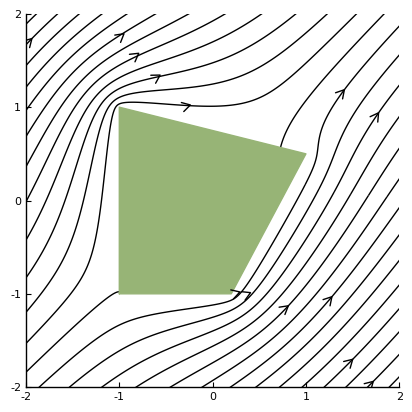

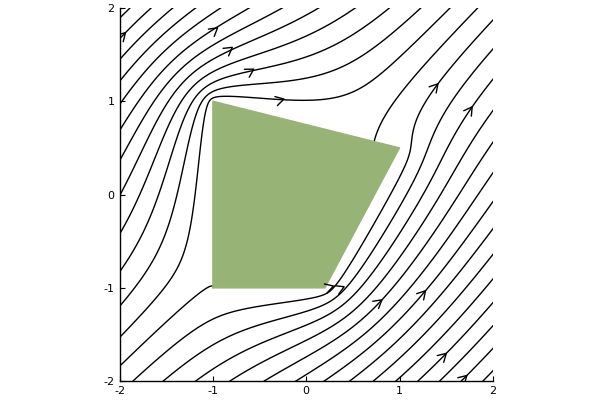

In [32]:
ps = streamlines(r,θ,(fs,body),xlim=(-2,2),ylim=(-2,2),show=true)
plot!(ps,body)
add_arrows!(ps,(fs,body))

Hang on... what? Complex variables? Make sure to review the notes in the [complex variables review notebook](2.1-ComplexVariablesNotes.ipynb) if you want to know why we would do this or feel uncomfortable...

Let's look at the complex form of the grid points we just set up:

In [13]:
zg

208×208 Array{Complex{Float64},2}:
 -2.07-2.07im  -2.07-2.05im  -2.07-2.03im  …  -2.07+2.05im  -2.07+2.07im
 -2.05-2.07im  -2.05-2.05im  -2.05-2.03im     -2.05+2.05im  -2.05+2.07im
 -2.03-2.07im  -2.03-2.05im  -2.03-2.03im     -2.03+2.05im  -2.03+2.07im
 -2.01-2.07im  -2.01-2.05im  -2.01-2.03im     -2.01+2.05im  -2.01+2.07im
 -1.99-2.07im  -1.99-2.05im  -1.99-2.03im     -1.99+2.05im  -1.99+2.07im
 -1.97-2.07im  -1.97-2.05im  -1.97-2.03im  …  -1.97+2.05im  -1.97+2.07im
 -1.95-2.07im  -1.95-2.05im  -1.95-2.03im     -1.95+2.05im  -1.95+2.07im
 -1.93-2.07im  -1.93-2.05im  -1.93-2.03im     -1.93+2.05im  -1.93+2.07im
 -1.91-2.07im  -1.91-2.05im  -1.91-2.03im     -1.91+2.05im  -1.91+2.07im
 -1.89-2.07im  -1.89-2.05im  -1.89-2.03im     -1.89+2.05im  -1.89+2.07im
 -1.87-2.07im  -1.87-2.05im  -1.87-2.03im  …  -1.87+2.05im  -1.87+2.07im
 -1.85-2.07im  -1.85-2.05im  -1.85-2.03im     -1.85+2.05im  -1.85+2.07im
 -1.83-2.07im  -1.83-2.05im  -1.83-2.03im     -1.83+2.05im  -1.83+2.07im
      ⋮         

Each of the points in this array is a unique $(x,y)$ location on the grid. The top left element in the array is actually the bottom left point on the grid.

## The basic building block flows

### The most basic: Uniform flow
First, let us inspect a uniform flow, also called a *free stream*.

$$ u = U_\infty \cos\alpha,\quad v = U_\infty \sin \alpha, \qquad \psi = U_\infty (y \cos\alpha - x \sin\alpha), \qquad \phi = U_\infty (x\cos\alpha + y \sin\alpha) $$

We can specify this with the strength of the flow. Let us set up a uniform flow with speed equal to 1 at an angle $\alpha = 45$ degrees ($\pi/4$ radians). We will use the complex polar notation for this:

#### Evaluation of the flow
Let's look at the streamlines of this uniform flow. For that, we evaluate the streamfunction on our grid (`zg`) that we set up earlier.

A few notes on the command below. We use the notation `PotentialFlow.streamfunction` to let it know that we are using the streamfunction command in the `PotentialFlow` package. Also, the `.=` makes sure to put the evaluated streamfunction on this grid into an array we have already set up (`ψ`).

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,(fs,body);

Plot the streamfunction contours

In [ ]:
ps = plot(xg,yg,ψ,xlim=(-2,2),ylim=(-2,2),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a uniform flow",show=true);
add_arrows!(ps,fs)

As expected, the streamlines are angled at 45 degrees.

Try some different angles to see the result.

We can also evaluate the **velocity field** of the free stream, using the `induce_velocity` function. It should show the same value everywhere:

In [ ]:
# the last argument is actually the time, but this is a steady flow, so it is irrelevant
induce_velocity(zg,fs,0.0) 

### Basic singularity: A source
Now, let's consider a source flow,

$$ u_r = Q/(2\pi r), \quad u_\theta = 0,\qquad \psi = \dfrac{Q \theta}{2\pi}, \qquad \phi = \dfrac{Q }{2\pi} \ln r$$

Let's place one at the origin with strength $Q$ equal to 1.

In [ ]:
zs = 0.0+im*0.0  # location of the source
Q = 1.0  # strength of the source
s = Source.Point(zs,Q)

Evaluate its streamfunction and plot it:

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,s);
p2 = plot(xg,yg,ψ,xlim=(-2,2),ylim=(-2,2),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a source",show=true)
add_arrows!(p2,s)

This looks as expected, but a little strange along the $-x$ axis. Remember, the streamfunction is multi-valued. This dark line is the **branch cut** of the streamfunction, where it jumps from one value to another across that line.

**SIDE NOTE:** We cannot avoid the branch cut, but we can move it to a different ray by using a rotation operator. To move it to some specified angle $\tau$, we rotate all of the evaluation points from $\tau$ to $-\pi$.

In [ ]:
τ = π/4 # angle at which we prefer the branch cut
rot = exp(-im*(π+τ))  # rotation operator, which moves rotates from $\tau$ to $-\pi$.
ψ .= PotentialFlow.streamfunction(zg.*rot,s);
p2 = plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamlines of a source",show=true)
add_arrows!(p2,s)

Let's evaluate the velocity field of the source. We will be a bit complicated about this, mostly for plotting purposes. Remember from the [field plotting notebook](1.2-PlottingFlowFields), the u and v components are stored at different places on a staggered grid. We therefore evaluate each component on a different set of points: 

In [ ]:
u.u .= real.(induce_velocity(zu,s,0.0))
u.v .= imag.(induce_velocity(zv,s,0.0));
ps1 = plot(xu,yu,u.u,levels=range(-1,1,length=31),clim=(-1,1),xlabel=L"x",ylabel=L"y",title="u component")
ps2 = plot(xv,yv,u.v,levels=range(-1,1,length=31),clim=(-1,1),xlabel=L"x",ylabel=L"y",title="v component")
plot(ps1,ps2)

### Another basic singularity: A point vortex
Now, let's consider a point vortex,

$$ u_r = 0, \quad u_\theta = \dfrac{\Gamma}{2\pi r},\qquad \psi = -\dfrac{\Gamma}{2\pi} \ln r, \qquad \phi = \dfrac{\Gamma \theta}{2\pi} $$

Let's place one at the origin with strength $\Gamma$ equal to 1.

In [ ]:
zv = 0.0+im*0.0  # location of the vortex
Γ = 1.0  # strength of the vortex
v = Vortex.Point(zv,Γ)

Evaluate its streamfunction and plot it:

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,v);
ps = plot(xg,yg,ψ,color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a vortex",show=true)
add_arrows!(ps,v)

### Another singularity: a dipole (or doublet)
A doublet is also a singularity, but higher order than the source and vortex. It has the form

$$ u_r = -\dfrac{D}{\pi r^2} \cos(\theta-\alpha),\quad u_\theta = -\dfrac{D}{\pi r^2} \sin(\theta-\alpha), \qquad \psi = -\dfrac{D}{\pi r} \sin(\theta-\alpha), \qquad \phi = \dfrac{D}{\pi r} \cos(\theta-\alpha) $$

$D$ is the strength and $\alpha$ the angle. Notice that it has both a $u_r$ and a $u_\theta$ component of velocity, and has a different dependence on $r$. It decays faster with distance away from the center.

Let's create a doublet of strength 1 at angle $\pi/4$:

In [ ]:
zd = 0.0+im*0.0
D = 1.0
α = π/4
d = Doublets.Doublet(zd,D*exp(im*α))

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,d);
ps = plot(xg,yg,ψ,xlim=(-2,2),ylim=(-2,2),levels=range(-1,1,length=15),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a doublet",show=true)
add_arrows!(ps,d)

### A corner flow
A corner flow is a flow in a sector of interior angle $\nu\pi$. It is generated by the streamfunction

$$ \psi(r,\theta) = \nu \sigma r^{1/\nu} \cos((\theta-\alpha)/\nu)$$

The strength is $\sigma$ and the rotation angle of the corner is $\alpha$.

Create a corner flow of strength 1 and interior angle $\pi/3$ (60 degrees). 

In [ ]:
ν = 0.5
σ = 1.0
α = 0.0
c = Corner(σ,ν,α)

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,c);
ps = plot(xg,yg,ψ,xlim=(-2,2),ylim=(-2,2),levels=range(-3,3,length=31),color=:black,xlabel=L"x",ylabel=L"y",title="Streamlines of a corner",show=true)
add_arrows!(ps,c)

Note the straight streamlines that cross at the origin. There is a stagnation point there.

## Combinations of potential flows
We can easily make combinations of potential flows, simply by adding them.

Let's try a combination of a uniform flow at 0 degrees and a source at the origin of strength 2:

In [ ]:
# The uniform flow
U∞ = 1.0  # speed
α = 0.0 # angle in radians
f = Freestreams.Freestream(U∞*exp(im*α))

# The source
zs = 0.0+im*0.0  # location of the source
Q = 2.0  # strength of the source
s = Source.Point(zs,Q)

We will add these, but take some care to use our rotation trick on the branch cut of the source, so that it is along the +x axis.

In [ ]:
τ = 0.0 # angle at which we prefer the branch cut
rot = exp(-im*(π+τ))
ψ .= PotentialFlow.streamfunction(zg,f) .+ PotentialFlow.streamfunction(zg.*rot,s);;
ps = plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamlines of a uniform flow + source",show=true)
add_arrows!(ps,(f,s))

There is a **stagnation point** in this flow somewhere to the left of the source, and this indicates that **stagnation streamlines** cross there.

To add the stagnation streamline to the plot, we can find the value of streamfunction at the stagnation point. This is the value it will have on the entire stagnation streamlines.

In this example, we can find the location of the stagnation point by hand, using the polar velocity components from the flow:

$$ u_r = U_\infty \cos\theta + \dfrac{Q}{2\pi r}, \quad u_\theta = 0 $$

The stagnation point is at $\theta = \pi$ and $r = a = Q/(2\pi U_\infty)$. In Cartesian coordinates, this is $x = -Q/(2\pi U_\infty)$ and $y = 0$.

To evaluate the streamfunction at a specific point, we first turn the grid of streamfunction values into a function of $x$ and $y$.

In [ ]:
ψfield = interpolatable_field(xg,yg,ψ);

Now evaluate it at the stagnation point:

In [ ]:
xstag = -Q/(2π*U∞)
ystag = 0
ψstag = ψfield(xstag,ystag)

Now add this streamline to the plot:

In [ ]:
ps = plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamlines of a uniform flow + source")
plot!(ps,xg,yg,ψ,levels=[ψstag],linewidth=2)
scatter!(ps,[xstag],[ystag],label="stagnation point",show=true)
add_arrows!(ps,(f,s))

### Another combination: two vortices
The tools provided in `PotentialFlow` do not require us to explicitly add the flows; it does it for us. This is especially useful with a lot of vortices. Let us try two point vortices, and place them at $(-1,0)$ and $(1,0)$, and give them strengths $1$ and $-1$:

In [ ]:
# First create empty arrays
zvort = ComplexF64[]
Γvort = Float64[]

# Add the first vortex to the array
push!(zvort,-1.0+0im)
push!(Γvort,1.0)

# add the second vortex to the array
push!(zvort,1.0+0im)
push!(Γvort,-1.0)

# Now make the list of vortices. Note the . after Vortex.Point, which is needed to create
# an array of point vortices
v = Vortex.Point.(zvort,Γvort)

The usual plot

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,v)
ps = plot(xg,yg,ψ,color=:black,levels=range(-1,1,length=15),xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamlines of a pair of vortices",show=true)
plot!(ps,v) # This adds markers for the vortices
add_arrows!(ps,v)

Let's evaluate the velocity at the origin, which is a convenient point on the vertical line in the middle:

In [ ]:
induce_velocity(0.0+im*0.0,v,0.0) # again, the last argument is time, which is irrelevant

The real part ($u$) is zero (as expected on this line of symmetry) and the imaginary part ($v$) is positive, indicating an **upward flow** between the two vortices.

### Another combination: several vortices
The tools provided in `PotentialFlow` do not require us to explicitly add the flows; it does it for us. This is especially useful with a lot of vortices. Let's try to make a circular **vortex patch**. This is formed from a collection of point vortices arranged in concentric rings. Each vortex will have the same strength.

Create one patch at $(-1,0)$ with strength 1

In [ ]:
xcent = -1.0
ycent = 0.0
Γ = 1.0
R = 0.5
nring = 5

v1 = vortex_patch(xcent,ycent,Γ,R,nring);

and another patch at $(1,0)$ with strength -1

In [ ]:
xcent = 1.0
ycent = 0.0
Γ = -1.0
R = 0.5
nring = 5

v2 = vortex_patch(xcent,ycent,Γ,R,nring);

We can combine them easily into something called a **tuple**

In [ ]:
vortex_system = (v1,v2);

Now plot them

In [ ]:
ψ .= PotentialFlow.streamfunction(zg,vortex_system)
ps = plot(xg,yg,ψ,color=:black,xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="Streamlines of two vortex patches",show=true)
plot!(ps,vortex_system)
add_arrows!(ps,vortex_system)

We can evaluate the velocity of this system at any point, e.g.,

In [ ]:
z_eval = 0.0+0.0*im
induce_velocity(z_eval,vortex_system,0.0)